In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [54]:
mpl.__version__

'3.4.3'

# 一个简单的例子
Matplotlib将数据画在Figures（图）上，比如说一个窗口、一个Jupyter插件中。每个图有一个或多个Axes（坐标轴组），每组Axes都是一个作图区，数据点根据Axes里的坐标系确定位置。最简单的创建一个带有Axes的Figure的方法是使用`pyplot.subplots`，接着我们就可以使用`Axes.plot`在Axes上将数据画出来

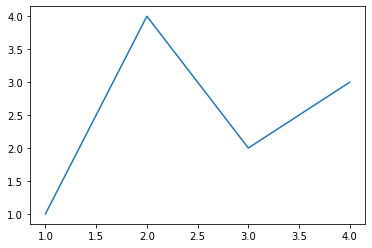

In [55]:
fig, ax = plt.subplots() # 创建一个带有一个axes的figure
ax.plot([1,2,3,4], [1,4,2,3]) # ax.plot(x,y)把一些数据画在axes上

# Figure的组成
下面是一个Figure的组成示意图：
![anatomy](anatomy.webp)

## Figure
Figure即是**整个**图像，它包含了图像中的所有Axes，以及一群特殊的我们叫Artists的对象（标题、图例、色块等），有时一个图像中还有其他子图像。

最简单的使用pyplot创建一个新Figure的几种方法如下：

<Figure size 432x288 with 0 Axes>

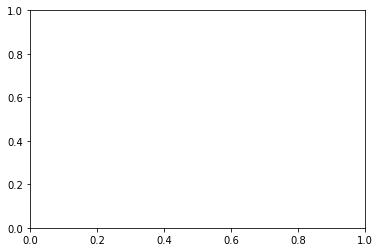

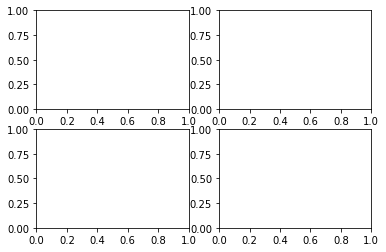

In [56]:
fig = plt.figure() # 创建一个没有Axes的空figure
fig, ax = plt.subplots() # 创建一个有一个Axes的figure
fig, axs = plt.subplots(2,2) # 创建一个有2*2布局（4个Axes）的figure

一般来说在创建Figure的时候会顺便创建Axes, 但是你也可以先创建Figure，之后手动往里面加Axes。

还有一点需要提一下，许多Matplotlib的后端都支持在figure的窗口中对凸显进行放大缩小和移动。

## Axes
Axes是一个Artist（这个词的意思后面会解释），它需要依附于Figure才能显示。它包含了一个能够用来作图的区域，一般包含2个Axis（坐标轴）对象，如果是3D图像则有三个Axis，（请注意Axes和Axis的区别）。每个Axis包含了tick（刻度）和ticklabel(刻度标签)，以指示图表中数据的大小尺度。


`Axes`除了有Axis，还有图表标题（通过`axes.set_title()`修改），x轴标签（通过`axes.set_xlabel()`修改）,y轴标签（通过`axes.set_ylabel()`修改）等。

Axes类和它的类函数是OOP接口的主要entry point(入口点), 大部分作图的方法都是在这之上定义的（比如上面的`ax.plot()`, 使用了Axes的`plot`方法）

## Axis
这类对象设定并生成了刻度（坐标轴上的标志线）和刻度标签（就是刻度线下面的字符）。刻度的位置由`Locator`对象定义，刻度标签的字符格式由`Formatter`定义。`Locator`和`Fommater`结合起来可以帮助我们很好地控制刻度位置和标签。

## Artist
基本上所有你能在Figure里面看到的对象都是Artist（甚至是Figure，Axes和Aixs）。这个分类还包括了`Text`文字对象，`Line2D`对象，`collections`对象，`Patch`对象……等。当我们生成图像时，所有的Artist都将在画布上呈现。大部分Artist都是和Axes绑定的，因此一个Artist不能被多个Axes共用，也不能从一个Axes移动到另一个Axes。

# 绘图函数的输入类型
绘图函数的期望输入为`numpy.array`或`numpy.ma.masked_array`,或其他能够转换为`numpy.array`的对象。与array类似的一些类如`pandas`的数据对象和`numpy.matrix`可能不会使函数如愿运行。这种情况下，在使用绘图函数之前，我们一般会把它们转换为`numpy.array`对象。比如在下面的例子中，对`numpy.matrix`进行了转换：

In [57]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asanyarray(b)

大部分Matplotlib中的方法还能够爬取可寻址对象中的数据，如*dict*,`numpy.recarray`或`pandas.DataFrame`.Matplotlib支持你在参数中提供目标数据的keyword,并根据获取的数据进行绘图。

Text(0, 0.5, 'Entry b')

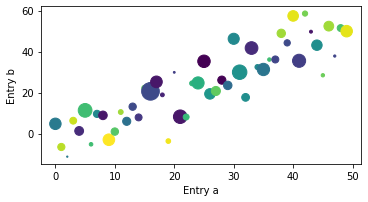

In [58]:
np.random.seed(19680801) # 固定生成的随机数序列
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.scatter('a', 'b', c="c", s='d', data=data)
ax.set_xlabel('Entry a')
ax.set_ylabel('Entry b')

# 代码风格
## 面向对象的接口和pyplot接口
正如题标题所说，使用Matplotlib有两种代码风格：
- 单独创建Figure和Axes对象，然后调用它们的功能（面向对象(OO)的风格）。
- 让pyplot自动创建和处理Figure和Axes对象，并使用pyplot的函数绘图

所以你可以使用OO风格的代码：

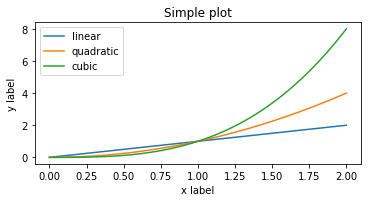

In [59]:
x = np.linspace(0, 2, 100) # 样本数据

# 注意即使在OO风格的代码中，我们也使用pyplot.figure创建Figure
fix, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.plot(x, x, label='linear') # 在axes上绘制一些数据
ax.plot(x, x**2, label='quadratic') #  在axes上绘制数据的平方
ax.plot(x, x**3, label='cubic') #  在axes上绘制数据的立方
ax.set_xlabel('x label') # 向axes中添加x轴标签
ax.set_ylabel('y label') # 向axes中添加y轴标签
ax.set_title('Simple plot') # 向axes中添加标题
ax.legend() # 添加图例

或是pyplot风格的代码

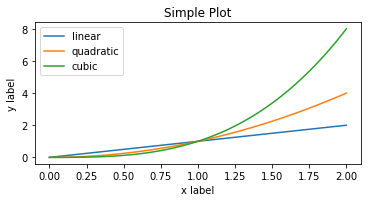

In [60]:
x = np.linspace(0, 2, 100) # 样本数据

plt.figure(figsize=(5, 2.7), constrained_layout=True)
plt.plot(x, x, label='linear') # 将数据绘制（在axes上）
plt.plot(x, x**2, label='quadratic') 
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

除此之外还有第三种方式，也就是当我们把Matplotlib嵌入到GUI中的情况。这时pyplot完全不能用，即使是创建Figure的功能都无法执行。关于第三种方式的详细内容见：[ Embedding Matplotlib in graphical user interface](https://matplotlib.org/stable/gallery/index.html#user-interfaces)


Matplotlib的文档和案例中这两种风格的代码都会使用，但一般来说我们建议使用OO风格的代码，特别是复杂绘图的时候，因为这时我们希望函数和脚本能够作为一个更大的项目的一部分被重复使用。但是对于一些比较快捷的任务，pyplot风格是非常方便的。

# 辅助函数
如果你需要在不同的数据集上多次进行绘图，或是想要简单地封装Matplotlib方法，使用下面建议的signature function(签名函数)。

In [61]:
def my_plotter(ax, data1, data2, param_dict):
    """
    作图的辅助函数
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

你可以使用两次这个函数来在两个子图上绘图：

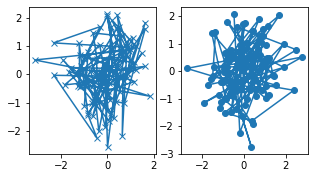

In [62]:
data1, data2, data3, data4 = np.random.randn(4, 100) # 返回4个样本量为100的数据集
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(5,2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker':'o'})

如果你想要把这些功能作为python包安装，或像其他网上的定制化模板那样进行安装，Matplotlib的[mpl-cookiecutter](https://github.com/matplotlib/matplotlib-extension-cookiecutter)可以提供这些支持。

# Artist的样式
大部分绘图方法都有选项来调节Artist的样式。你可以在绘图方法调用时就进行设置，或使用Artist自己的“setter（调节器）”。在下面的图中，我们在使用`plot`创建Artists时就手动定义了*颜色、线宽*和*线类型*，并对第二条线使用`set_linestyle`对线类型进行了设置。

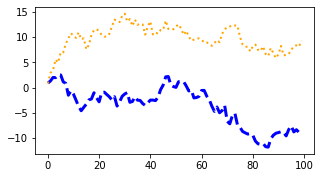

In [63]:
fig, ax = plt.subplots(figsize = (5,2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(":")

## 颜色
Matplotlib的颜色配置非常灵活，并且能够被大部分Artist所接受。详细信息可以看[colors tutorial](https://matplotlib.org/stable/tutorials/colors/colors.html)。一些Artist可以接收多个颜色参数，如对于`scatter`散点绘图，点的边和内部的颜色可以不同：

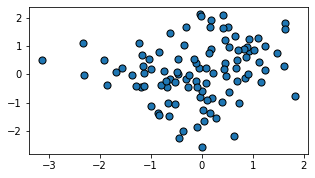

In [64]:
fig, ax = plt.subplots(figsize = (5,2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

## 线宽、线类型和记号大小
线宽是典型的使用印刷点（pt）作为单位的参数（1 pt = 1/72 inch = 2.54/72 cm），这个参数能应用在所有有描边线的Artist上。与此类似地，我们也可以定义描边线的类型。见[linestyles example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)中的例子。


记号大小的定义取决于`plot`中的那种方法进行了绘图。它定义记号点的大小，一般来说是记号点的“直径”或宽度。在`scatter`中，记号的大小被设定为与记号的视觉区域大致成比例的参数。Matplotlib中可用的记号类型有对应的字节码（见[markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)），用户也可以通过`MarkerStyle`定义自己的记号类型。

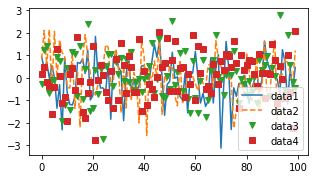

In [65]:
fig, ax = plt.subplots(figsize = (5,2.7))
ax.plot(data1, '-', label='data1')
ax.plot(data2, '--', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

# 绘制标签
## Axes的标签和文本

`set_xlabel`、`set_ylabel`和`set_title`可以用来在特定的位置添加文本（更多信息见[Text in Matplotlib Plots](https://matplotlib.org/stable/tutorials/text/text_intro.html)）。你也可以直接使用`text`在绘图时添加文本。

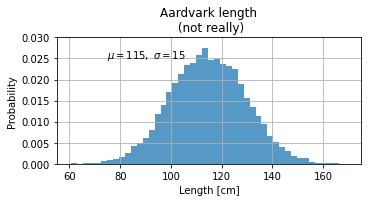

In [66]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000) # 数据
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
# 数据的直方图
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel("Length [cm]")
ax.set_ylabel("Probability")
ax.set_title('Aardvark length\n (not really)')
ax.text(75, 0.025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

所有的`text`函数都会返回一个`matplotlib.text.Text`实例。在上面的代码中，你可以通过添加属性相关的参数来进一步个性化你的文本：

In [67]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

与文本相关的属性参数详见[Text properties and layout](https://matplotlib.org/stable/tutorials/text/text_props.html)。

## 向文本中添加数学表达式
Matplotlib的所有文本中都可以接受Tex格式的表达式。举例来说，如果你想在标题中添加$\sigma_i=15$，你可以在两个“$”符号中间输入TeX表达式：

In [68]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

在文本前面的`r`指定了字符串为*纯*字符串，反斜杠“\”不应被处理为python的转义符。Matplotlib有内置的Tex表达式的分析与呈现引擎，并有它自己的数学格式，详见[Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html)。你也可以直接使用LaTeX来安排版式，并合并到最终呈现的图像中，详见[Text rendering with LaTeX](https://matplotlib.org/stable/tutorials/text/usetex.html)

## 注释
我们也可以在绘图时添加注释。一般使用*xy*指定注释箭头顶端的位置，*xytext*指定注释箭头末端和文字的位置：

(-2.0, 2.0)

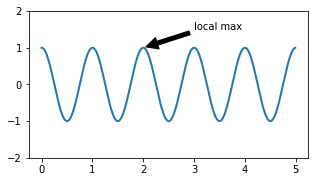

In [69]:
fig, ax = plt.subplots(figsize = (5,2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)

line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2,1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_ylim(-2, 2)

在这个简单的例子中，*xy*和*xytext*都是用的数据的坐标。你还可以选择其他各种类型的坐标系，见[Basic annotation ](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial)和[Advanced Annotations](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)。更多例子见[Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)。

## 图示
有时我们会想用`Axes.legend`标识出线和记号的意义：

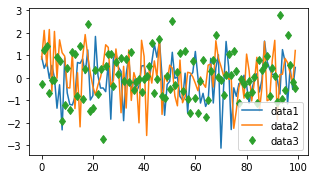

In [70]:
fig, ax = plt.subplots(figsize = (5,2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd',label='data3')
ax.legend()

Matplotlib中的图示的呈现方式、位置和它们能展示的Artist都非常多样，详见[Legend guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html)

# 坐标轴标尺和刻度
每个Axes都有两个（或三个）坐标轴`Axis`对象，分别为x轴和y轴。这两个对象可以控制坐标轴的标尺、刻度位置和刻度格式。新添加的Axes可以用来呈现其他的Axis对象。


## 标尺
除了线性的标尺，Matplotlib还支持非线性的标尺，如log标尺。由于log标尺使用的频率很高，它们也有自己的方法，如`loglog`, `semilogx`和`semilogy`。标尺的形式很多，更多的例子详见[Scales](https://matplotlib.org/stable/gallery/scales/scales.html)。下面的案例中我们手动设置一个标尺：

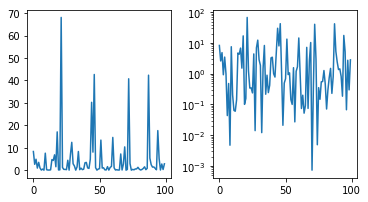

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(5,2.7), constrained_layout=True)
xdata = np.arange(len(data1)) # 生成一组data1的序号
data = 10 ** data1

axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

标尺规定了我们怎样沿着坐标轴将数据映射到空间中。这一操作在两个坐标轴方向上都会进行，两个方向上结合起来即是一个*变换*。通过变换，Matplotlib把数据坐标映射到Axes、图像或屏幕坐标系中。详见[Transformations Tutorial](https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html)。

## 刻度的位置和格式
每个坐标轴都有坐标*locator*和格式*formatter*两个参数来决定坐标轴的刻度位置和展示形式。一个简单的例子是`set_xticks`:

Text(0.5, 1.0, 'Manual ticks')

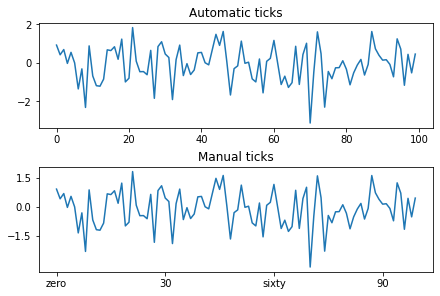

In [72]:
fig, axs = plt.subplots(2, 1,constrained_layout=True)

axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30))
axs[1].set_xticklabels(['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5]) # 注意这里我们没指定刻度的标签，而直接使用刻度的值
axs[1].set_title('Manual ticks')

不同的标尺有不同的坐标和格式，比如对于log标尺就有LogLocator和LogFommater.其他类型的locator和formatter详见[Tick locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html)

## 在绘图中使用日期和字符串
Matplotlib能处理日期组成的数组和字符串（和浮点数）组成的数组。不过处理它们需要合适的locator和formatter。对于日期：

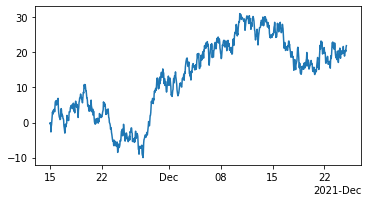

In [73]:
fig, ax = plt.subplots(figsize = (5,2.7),constrained_layout=True)
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'), np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator)
ax.xaxis.set_major_formatter(cdf)

更多信息见日期相关的案例，如[Date tick labels](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html)。

对于字符串，我们会在分类变量的绘图中使用（见[Plotting categorical variables](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html)）:

<BarContainer object of 4 artists>

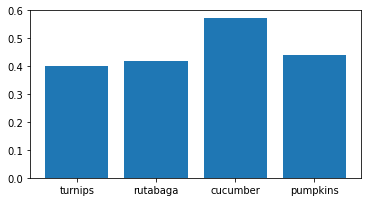

In [74]:
fig, ax = plt.subplots(figsize = (5,2.7),constrained_layout=True)
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

关于分类变量的一个坑在于，有一些方法会将文本文件分析后返回为一个字符串组成的列表，尽管这些字符串可能代表的含义是数字或时间。如果你传入了1000个字符串，那么Matplotlib会认为你传入了1000个分类，并会在你的绘图中添加1000个标签！

## 增加坐标轴对象
将不同数量级的数据绘制在同一张表上时，可能需要增加第二个y轴。你可以使用`twinx`创建一个新的Axes，与当前的Axes共享同一个x轴，但是y轴在右侧（`twiny`的话则是两个Axes共享一个y轴）。更多例子请参考[Plots with different scales](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)。

类似地，你可以在主坐标轴之外通过`secondary_xaxis`或`secondary_yaxis`添加使用另一个标尺的坐标轴，以呈现不同尺度的数据或单位。更多例子见[Secondary Axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html)。

Text(0.5, 0, 'Angle [rad]')

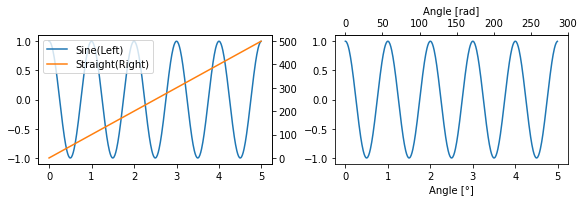

In [75]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(8,2.7), constrained_layout=True)
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine(Left)', 'Straight(Right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [°]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [rad]')

# 使用颜色表示数据
我们经常需要在绘图中使用第三个维度，也就是颜色，来表现数据。Matplotlib有多种绘图类型来实现这一点：

Text(0.5, 1.0, 'scatter()')

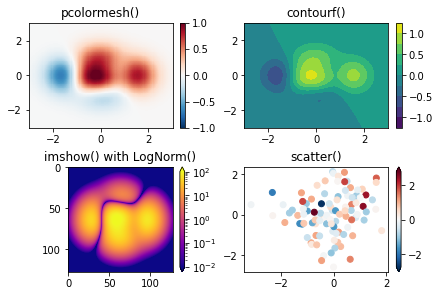

In [76]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, constrained_layout=True)
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r', shading='auto')
fig.colorbar(pc, ax=axs[0,0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0,1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1,0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1,1], extend='both')
axs[1, 1].set_title('scatter()')

## 颜色图
上述的例子都是`ScalarMappable`对象衍生出的Artist。它们都是将*vmin*和*vmax*之间的数字线性映射到了一个由`cmap`定义的颜色图上。Matplotlib中有很多不同的颜色图可以选择 ([Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)),你也可以自定义一个颜色图（[Creating Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html)） 或者把这个颜色图当做[第三方的包](https://matplotlib.org/mpl-third-party/#colormaps-and-styles)使用。

## 正则化
有时我们会需要把非线性的数据用颜色图来表现，比如前面提到的`LogNorm`例子。这时我们可以给ScalarMappable提供*norm*参数（正则化）而不是*vmin*和*vmax*。更多正则化的例子见[Colormap Normalization](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html)。

## 颜色栏
你可以在图像中增加颜色栏`colorbar`来提示数据和对应颜色的关系。颜色栏是Figure级别的Artist，并且需要与一个ScalarMappable对象绑定（并由ScalarMappable提供正则化信息和颜色图信息）。颜色栏通常会占据一块原本属于Axes的位置。对颜色栏的位置进行调整比较复杂，详见[Placing Colorbars](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html)。你可以通过一些参数改变颜色栏的外观，如使用*extend*参数在颜色栏的两端增加箭头，使用*shrink*和*aspect*来控制大小。最后，根据正则化的不同，颜色栏会有相对应的默认locator和formatter，它们的修改方式和其他Axis对象一样。

# 使用多Figure和多Axes
你可以通过多次调用`fig = plt.figure()`或者`fig2, ax = plt.subplots()`来打开多个Figure对象。创建每个Figure时使用不同的引用名并保留它们，这样你就可以通过引用名来像其中添加Artist。

有很多种方法可以用来添加多个Axes，但最基础的是前面提到的`plt.subplots()`。你可以使用`subplot_mosaic`来实现更复杂的布局，让Axes对象在行或列上跨越分布。

Text(0.5, 1.0, 'right')

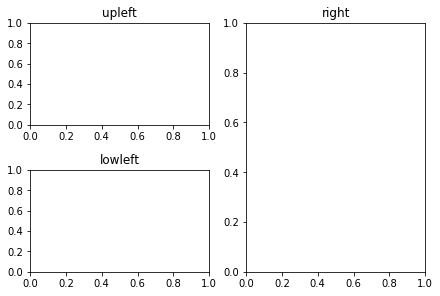

In [77]:
fig, axd =plt.subplot_mosaic([['upleft', 'right'], ['lowleft', 'right']], constrained_layout=True) 
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

# 扩展阅读
更多绘图类型见[Plot types](https://matplotlib.org/stable/plot_types/index.html)和[API reference](https://matplotlib.org/stable/api/index.html), 尤其是[Axes API](https://matplotlib.org/stable/api/axes_api.html)。